In [3]:
# unzip the dataset
import zipfile

In [4]:
zip_file_paths = ["trainImages.zip","validationImages.zip"]

In [5]:
for path in zip_file_paths:
    name = str(path)
    with zipfile.ZipFile(path, 'r') as zip_ref:
        zip_ref.extractall(f'unzipped/{name.split(".")[0]}')
        

In [6]:
import pandas as pd

In [7]:
df_validation = pd.read_csv('unzipped/validationImages/validation/labels/detections.csv')
df_validation.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,0001eeaf4aed83f9,xclick,/m/0cmf2,1,0.022673,0.964201,0.071038,0.800546,0,0,0,0,0
1,000595fe6fee6369,xclick,/m/02wbm,1,0.000000,1.000000,0.000000,1.000000,0,0,1,0,0
2,000595fe6fee6369,xclick,/m/02xwb,1,0.141384,0.179676,0.676275,0.731707,0,0,0,0,0
3,000595fe6fee6369,xclick,/m/02xwb,1,0.213549,0.253314,0.299335,0.354767,1,0,0,0,0
4,000595fe6fee6369,xclick,/m/02xwb,1,0.232695,0.288660,0.490022,0.545455,1,0,0,0,0


In [8]:
df_train = pd.read_csv('unzipped/trainImages/train/labels/detections.csv')
df_train.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,...,0,0,0.148438,0.012500,0.059375,0.195312,0.148438,0.357812,0.587500,0.325000
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,...,0,0,0.025000,0.248438,0.276563,0.214062,0.914062,0.714063,0.782813,0.948438
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,...,0,0,0.243750,0.151562,0.310937,0.262500,0.198437,0.434375,0.507812,0.590625
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,...,0,0,0.315625,0.429688,0.256250,0.423438,0.651563,0.921875,0.826562,0.925000
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,...,0,0,0.317188,0.257812,0.346875,0.307812,0.235938,0.289062,0.348438,0.385938


In [9]:
data_path_validation = "unzipped/validationImages/validation/data/*.jpg"
data_path_train = "unzipped/trainImages/train/data/*.jpg"

In [10]:
import glob 
counter = 0

img_paths = data_path_train
folder = glob.glob(img_paths)

for i in folder:
    counter +=1
    
print(counter)

517


In [11]:
import glob 
counter = 0

img_paths = data_path_validation
folder = glob.glob(img_paths)

for i in folder:
    counter +=1
    
print(counter)

9


In [12]:
# Get image ids 
# index = unzipped/trainImages/train/data/0005a922e055c723.jpg
# 32, 48
# index = unzipped/validationImages/validation/data/1602934b52b119cc.jpg
# 42, 58

import glob 


train_list_ids = []
validation_list_ids = []

def get_ids (split, print_this, to_append_list):
    start = 0
    end = 0
    if split == data_path_train:
        start,end = 32,48
    elif split == data_path_validation:
        start,end = 42,58
    else:
        raise Exception("Invalid split path")
        
    folder = split
    img_paths = glob.glob(folder)
    
    img_ids = to_append_list
    
    
    for i in img_paths:
        id = i[start:end]
        img_ids.append(id)
    print(len(img_ids))
    print(print_this)

In [13]:
get_ids (data_path_train, "I finished the task", train_list_ids)

517
I finished the task


In [14]:
get_ids (data_path_validation, "I finished the task", validation_list_ids)

9
I finished the task


In [15]:
train_classes_df = pd.read_csv("unzipped/trainImages/train/metadata/classes.csv", names=['className','Object'])



In [16]:
train_identifier = train_classes_df[train_classes_df['Object'] == 'Plastic bag']
print(train_identifier)

     className       Object
327  /m/05gqfk  Plastic bag


In [17]:
import random
def random_row_from_df(split):
    dataframe=""
    
    if split == "train":
        dataframe, ids_to_check = df_train, train_list_ids
    elif split == "validation":
        dataframe, ids_to_check = df_validation, validation_list_ids
    else:
        raise Exception("Invalid parameter, must be either train or valiation")
    
    img_ids_len = len(ids_to_check)
    rand = random.randint(0, img_ids_len-1)
    id = ids_to_check[rand]
    print(id)
    r = dataframe.loc[(dataframe.ImageID == id) & (dataframe.LabelName == '/m/05gqfk')]
    print(r)

In [18]:
random_row_from_df("train")

0345e899cc440fde
                 ImageID  Source  LabelName  Confidence      XMin      XMax  \
293215  0345e899cc440fde  xclick  /m/05gqfk           1  0.347019  0.455523   

            YMin      YMax  IsOccluded  IsTruncated  ...  IsDepiction  \
293215  0.281739  0.462609           1            0  ...            0   

        IsInside  XClick1X  XClick2X  XClick3X  XClick4X  XClick1Y  XClick2Y  \
293215         0  0.389052  0.347019  0.455523   0.42131  0.281739  0.358261   

        XClick3Y  XClick4Y  
293215  0.441739  0.462609  

[1 rows x 21 columns]


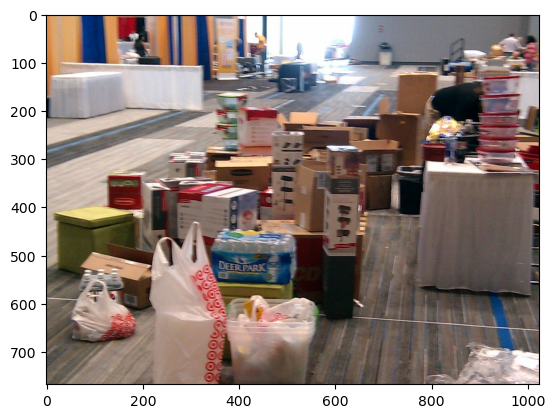

In [19]:
# Visualiza random images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from PIL import Image
import glob

validation_images_path = "unzipped/validationImages/validation/data/*.jpg"
train_images_path = "unzipped/trainImages/train/data/*.jpg"

def visualize_random_image(split):
    split_path = train_images_path if split == 'train' else validation_images_path if split == 'validation' else 0
    if split_path == 0:
        raise Exception("Invalid input parameter, must be either train or validation")
    images_folder = split_path
    images_paths = glob.glob(images_folder)
    num_of_images = len(images_paths)
    random_int = random.randint(0, num_of_images -1)
    random_image = images_paths[random_int]
    img = mpimg.imread(random_image)
    
    fig, ax = plt.subplots()
    ax.imshow(img)
    imgplot = plt.imshow(img)
    return imgplot


visualize_random_image("train")

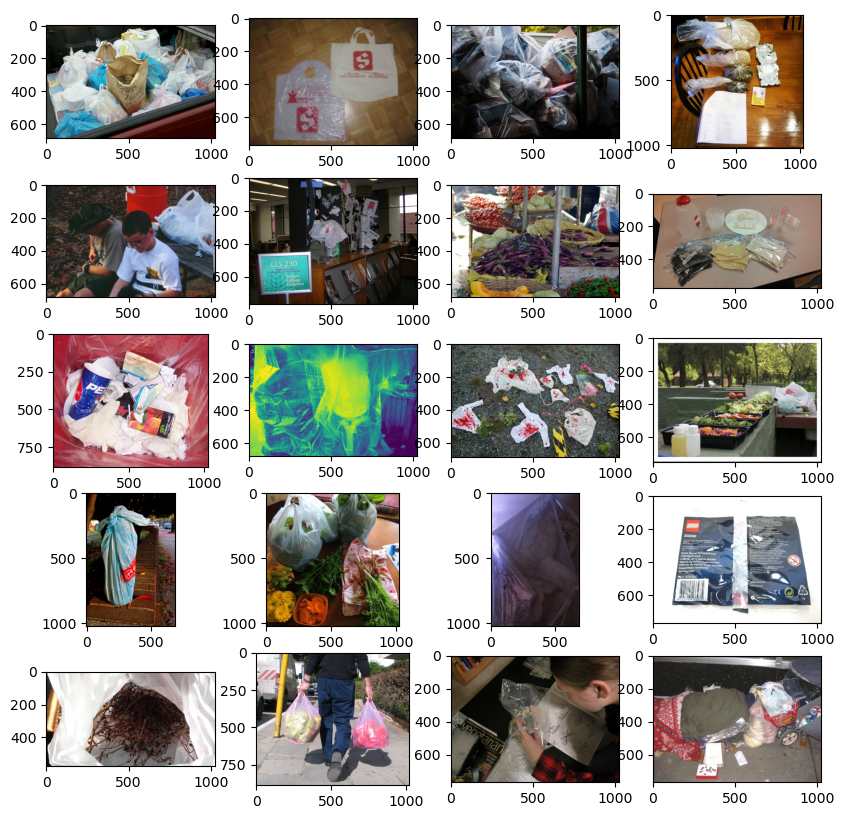

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

fig = plt.figure(figsize=(10,10))

columns = 4
rows = 5

validation_images_path = "unzipped/validationImages/validation/data/*.jpg"
train_images_path = "unzipped/trainImages/train/data/*.jpg"
                      
def visualize_many(from_num, to_num, dataset):
    dataset_path = train_images_path if dataset == 'train' else validation_images_path if dataset == 'validation' else 0
    if dataset_path == 0:
        raise Exception("Invalid input parameter, must be either train or validation")
    images_paths = glob.glob(dataset_path)
    
    index_counter = 1
    for i in range(from_num, to_num):
        counter = i
        image = images_paths[counter]
        img = mpimg.imread(image)
        fig.add_subplot(rows, columns, index_counter)
        plt.imshow(img)
        index_counter +=1
    plt.show()

    
visualize_many(0,20,"train")

0.753125 0.963125 0.181733 0.656309
771.2 986.24 123.57844 446.29012


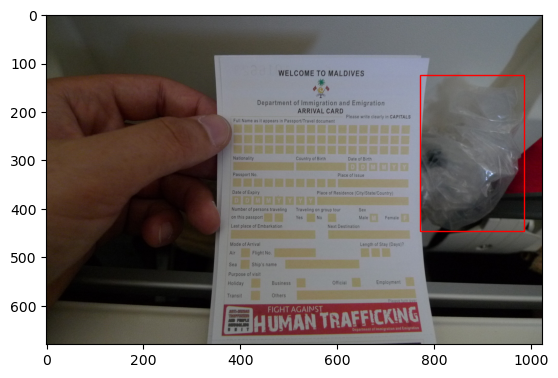

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import random
import glob
from PIL import Image

validation_images_path = "unzipped/validationImages/validation/data/*.jpg"
train_images_path = "unzipped/trainImages/train/data/*.jpg"


def visualize_bb(dataset):
    images_path = train_images_path if dataset == 'train' else validation_images_path if dataset == 'validation' else 0
    if dataset == 0:
        raise Exception("Invalid input parameter, must be either train or validation")
    
    start = 0
    end = 0
    
    if dataset == 'train':
        start, end, df, split = 32, 48, df_train, "trainImages"
    elif dataset == 'validation':
        start, end, df, split = 42, 58, df_validation, "validationImages"
    else:
        raise Exception("Invalid parameter")
    
    image_folder = images_path
    images_paths = glob.glob(image_folder)
    num_of_images = len(images_paths)
    random_int = random.randint(0, num_of_images -1)
    random_image = images_paths[random_int]
    #print(random_image)
    img = Image.open(random_image)
    id_of_image = random_image[start:end]
    
    df_rows = df.loc[(df.ImageID == id_of_image) & (df.LabelName == '/m/05gqfk')]
    
    image_width, image_height = img.size
    
    fig ,ax = plt.subplots()
    ax.imshow(img)
    
    
    for index, row in df_rows.iterrows():
        print(row['XMin'], row['XMax'], row['YMin'], row['YMax'])
        
        xmin = row['XMin']
        xmax = row['XMax']
        ymin = row['YMin']
        ymax = row['YMax']
        
        new_xmin = xmin * image_width
        new_xmax = xmax * image_width
        new_ymin = ymin * image_height
        new_ymax = ymax * image_height
        print(new_xmin,new_xmax,new_ymin,new_ymax)
        
        
        width = new_xmax - new_xmin
        height = new_ymax - new_ymin
        
        rect = patches.Rectangle((new_xmin,new_ymin), width, height, linewidth = 1, edgecolor = 'r', facecolor = 'none')
        ax.add_patch(rect)
    plt.show()
    
visualize_bb("train")


In [22]:
print(len(df_train))
print(len(df_validation))

14610229
303980


In [23]:
def clean_dataframe(df_for_train,df_for_validation):
    df_train_cleansed = df_train[df_train['LabelName'].str.contains('/m/05gqfk')]
    df_validation_cleansed = df_validation[df_validation['LabelName'].str.contains('/m/05gqfk')]
    
    return df_train_cleansed, df_validation_cleansed

df_train_cleansed, df_validation_cleansed = clean_dataframe(df_train, df_validation)


In [24]:
len(df_train_cleansed)


986

In [25]:
# 986 because some images have multiple plastic bag bounding boxes


In [26]:
len(df_validation_cleansed)


9

In [27]:
df_validation_cleansed

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
26213,1602934b52b119cc,xclick,/m/05gqfk,1,0.000000,1.000000,0.000000,1.000000,1,0,1,0,0
86384,488ab15e2780bec9,xclick,/m/05gqfk,1,0.000000,1.000000,0.023599,1.000000,0,0,1,0,0
92793,4e24222b68123ef3,xclick,/m/05gqfk,1,0.377083,0.745833,0.778125,0.968750,0,0,0,0,0
98200,527bec033e8298a5,xclick,/m/05gqfk,1,0.107813,0.995313,0.106250,0.993750,0,0,0,0,0
148850,7e25a4a33611d933,xclick,/m/05gqfk,1,0.000000,1.000000,0.000000,1.000000,0,0,1,0,0
164842,8ba1eddf57c8c0ba,xclick,/m/05gqfk,1,0.000000,1.000000,0.000000,1.000000,0,0,0,0,0
213535,b300a5975ac68399,xclick,/m/05gqfk,1,0.240625,0.803125,0.064583,1.000000,0,0,1,0,0
276292,e80333c5111504d1,xclick,/m/05gqfk,1,0.000000,0.998437,0.050000,0.962500,0,0,0,0,0
281928,ecd5fc22a65b8d32,xclick,/m/05gqfk,1,0.000000,0.998437,0.000000,0.991667,0,0,1,0,0


In [28]:
df_train_cleansed


,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
8282,0005a922e055c723,xclick,/m/05gqfk,1,0.000000,0.999375,0.000000,0.998889,0,1,...,0,0,0.546875,0.700000,0.000000,0.999375,0.000000,0.998889,0.000000,0.593333
8733,000610ca2148a5ec,xclick,/m/05gqfk,1,0.163227,0.811445,0.051875,0.936875,0,0,...,0,0,0.740150,0.163227,0.811445,0.811445,0.051875,0.161250,0.936875,0.936875
10247,00075e339f3d4f37,xclick,/m/05gqfk,1,0.017578,0.999023,0.000000,0.998529,0,1,...,0,0,0.263672,0.999023,0.516602,0.017578,0.000000,0.107353,0.998529,0.385294
12496,00097c09aca0cabf,xclick,/m/05gqfk,1,0.112000,0.634000,0.000000,0.909414,1,1,...,0,0,0.355000,0.634000,0.325000,0.112000,0.000000,0.390764,0.909414,0.600355
40914,002c60d5fbc94244,xclick,/m/05gqfk,1,0.375000,0.461250,0.646993,0.772829,0,0,...,0,0,0.433125,0.375000,0.461250,0.457500,0.646993,0.755011,0.766147,0.772829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14525006,fe4b9d8d0eab74a6,xclick,/m/05gqfk,1,0.451562,0.621094,0.562500,0.762500,0,0,...,0,0,0.557031,0.451562,0.621094,0.474219,0.562500,0.753125,0.687500,0.762500
14577519,ff58508650906267,xclick,/m/05gqfk,1,0.106771,0.721354,0.093750,0.873047,0,0,...,0,0,0.630208,0.106771,0.205729,0.721354,0.093750,0.210938,0.873047,0.777344
14578273,ff5bc2ace3cdd410,xclick,/m/05gqfk,1,0.182031,0.503906,0.196289,0.707031,1,0,...,0,0,0.294531,0.182031,0.503906,0.328906,0.196289,0.372070,0.292969,0.707031
14578274,ff5bc2ace3cdd410,xclick,/m/05gqfk,1,0.484375,0.794531,0.218750,0.805664,0,0,...,0,0,0.532813,0.794531,0.690625,0.484375,0.218750,0.488281,0.805664,0.377930


In [29]:
from sklearn.model_selection import train_test_split


train, test = train_test_split(df_train_cleansed, test_size = 0.2, random_state = 42)

In [30]:
train

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
10807483,b9176db9b1661faa,xclick,/m/05gqfk,1,0.231111,0.502222,0.540000,0.652500,0,0,...,0,0,0.373333,0.231111,0.275556,0.502222,0.540000,0.587500,0.652500,0.587500
3193099,3435faef2c5ccd6a,activemil,/m/05gqfk,1,0.005625,0.990000,0.001667,0.995833,-1,-1,...,-1,-1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
13211126,e39390cebf26f22c,xclick,/m/05gqfk,1,0.213867,0.742188,0.101562,0.643229,0,0,...,0,0,0.591797,0.256836,0.213867,0.742188,0.101562,0.119792,0.643229,0.572917
6702608,711d64cd98b9be73,xclick,/m/05gqfk,1,0.000000,0.999167,0.000000,0.998750,0,1,...,0,0,0.348333,0.000000,0.316667,0.999167,0.000000,0.831250,0.998750,0.906250
5729014,60516e61f76f6ebf,xclick,/m/05gqfk,1,0.245833,0.465000,0.740625,0.887500,1,0,...,0,0,0.320833,0.245833,0.425833,0.465000,0.740625,0.887500,0.882500,0.740625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436203,05642dbfac7ae5b0,xclick,/m/05gqfk,1,0.222656,0.994531,0.203125,0.970833,1,1,...,0,0,0.558594,0.222656,0.471094,0.994531,0.203125,0.380208,0.970833,0.598958
2105961,216da3e31dfbb78d,xclick,/m/05gqfk,1,0.552500,0.796250,0.429167,0.721667,1,0,...,0,0,0.648750,0.552500,0.676250,0.796250,0.429167,0.540833,0.721667,0.606667
12289483,d2e1237d3c2846e9,xclick,/m/05gqfk,1,0.486250,0.693750,0.450281,0.999062,1,1,...,0,0,0.635000,0.693750,0.486250,0.530000,0.450281,0.503752,0.999062,0.999062
5017725,53ef69782bdc1d63,xclick,/m/05gqfk,1,0.378019,0.983092,0.048128,0.907308,1,1,...,0,0,0.670290,0.378019,0.594203,0.983092,0.048128,0.324421,0.907308,0.631016


In [31]:
test

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
8043647,888fea91e5a0e984,xclick,/m/05gqfk,1,0.293125,0.601875,0.196998,0.910882,1,0,...,0,0,0.378750,0.293125,0.601875,0.423750,0.196998,0.405253,0.575985,0.910882
5494785,5c3a12529a5afe93,xclick,/m/05gqfk,1,0.000000,0.998438,0.233333,0.997917,1,1,...,0,0,0.328125,0.000000,0.846875,0.998438,0.233333,0.564583,0.997917,0.497917
10048712,abd0b8f885cadc1e,xclick,/m/05gqfk,1,0.675000,0.989583,0.580469,0.891406,1,0,...,0,0,0.806250,0.675000,0.728125,0.989583,0.580469,0.697656,0.891406,0.860938
5040124,544ee383a0319bfa,xclick,/m/05gqfk,1,0.000000,0.999375,0.000000,0.999074,1,1,...,0,0,0.347500,0.000000,0.999375,0.891875,0.000000,0.539815,0.179630,0.999074
2147024,221dd6f9138951a7,xclick,/m/05gqfk,1,0.595625,0.766875,0.431265,0.542812,1,0,...,0,0,0.696875,0.595625,0.621875,0.766875,0.431265,0.500393,0.542812,0.500393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104154,102e5834dbf0b1cc,xclick,/m/05gqfk,1,0.528125,0.662500,0.613333,0.728333,1,0,...,0,0,0.538125,0.528125,0.586250,0.662500,0.613333,0.633333,0.728333,0.692500
5995456,64f1b54aa2f25853,xclick,/m/05gqfk,1,0.683750,0.998750,0.000000,0.335000,1,1,...,0,0,0.760000,0.683750,0.892500,0.998750,0.000000,0.000000,0.335000,0.098333
135411,011c2e4461eb1fdc,xclick,/m/05gqfk,1,0.306836,0.998410,0.152500,0.998750,1,1,...,0,0,0.995231,0.998410,0.833068,0.306836,0.152500,0.682500,0.998750,0.547500
9872849,a8b17d203d9eea1a,xclick,/m/05gqfk,1,0.125000,0.181667,0.466250,0.661250,0,0,...,0,0,0.160000,0.125000,0.128333,0.181667,0.466250,0.468750,0.661250,0.658750


In [32]:
import os.path
from os import path
path = "unzipped/testImages"
os.mkdir(path)

In [33]:
path = "unzipped/testImages/data"
os.mkdir(path)

In [34]:
test_ids = test["ImageID"].values.tolist()

In [35]:
len(test_ids)

198

In [36]:
train_ids = train["ImageID"].values.tolist()


In [37]:
len(train_ids)


788

In [38]:
import shutil
import glob

to_loop = 'unzipped/trainImages/train/data/*.jpg'
folder = glob.glob(to_loop)

new_path = 'unzipped/testImages/data'

for path in folder:
    id = path[32:48]
    if ((id in test_ids)and (id in train_ids)):
        shutil.copy(path, f"{new_path}/{id}.jpg")
    elif ((id in test_ids) and (id not in train_ids)):
        shutil.move(path, f"{new_path}/{id}.jpg")
        

In [39]:
train_df = train.copy()
test_df = test.copy()

In [40]:
train_df.rename(columns = {"LabelName": "className"}, inplace = True)
train_df

,ImageID,Source,className,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
10807483,b9176db9b1661faa,xclick,/m/05gqfk,1,0.231111,0.502222,0.540000,0.652500,0,0,...,0,0,0.373333,0.231111,0.275556,0.502222,0.540000,0.587500,0.652500,0.587500
3193099,3435faef2c5ccd6a,activemil,/m/05gqfk,1,0.005625,0.990000,0.001667,0.995833,-1,-1,...,-1,-1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
13211126,e39390cebf26f22c,xclick,/m/05gqfk,1,0.213867,0.742188,0.101562,0.643229,0,0,...,0,0,0.591797,0.256836,0.213867,0.742188,0.101562,0.119792,0.643229,0.572917
6702608,711d64cd98b9be73,xclick,/m/05gqfk,1,0.000000,0.999167,0.000000,0.998750,0,1,...,0,0,0.348333,0.000000,0.316667,0.999167,0.000000,0.831250,0.998750,0.906250
5729014,60516e61f76f6ebf,xclick,/m/05gqfk,1,0.245833,0.465000,0.740625,0.887500,1,0,...,0,0,0.320833,0.245833,0.425833,0.465000,0.740625,0.887500,0.882500,0.740625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436203,05642dbfac7ae5b0,xclick,/m/05gqfk,1,0.222656,0.994531,0.203125,0.970833,1,1,...,0,0,0.558594,0.222656,0.471094,0.994531,0.203125,0.380208,0.970833,0.598958
2105961,216da3e31dfbb78d,xclick,/m/05gqfk,1,0.552500,0.796250,0.429167,0.721667,1,0,...,0,0,0.648750,0.552500,0.676250,0.796250,0.429167,0.540833,0.721667,0.606667
12289483,d2e1237d3c2846e9,xclick,/m/05gqfk,1,0.486250,0.693750,0.450281,0.999062,1,1,...,0,0,0.635000,0.693750,0.486250,0.530000,0.450281,0.503752,0.999062,0.999062
5017725,53ef69782bdc1d63,xclick,/m/05gqfk,1,0.378019,0.983092,0.048128,0.907308,1,1,...,0,0,0.670290,0.378019,0.594203,0.983092,0.048128,0.324421,0.907308,0.631016


In [41]:
test_df.rename(columns = {"LabelName": "className"}, inplace = True)
test_df

,ImageID,Source,className,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
8043647,888fea91e5a0e984,xclick,/m/05gqfk,1,0.293125,0.601875,0.196998,0.910882,1,0,...,0,0,0.378750,0.293125,0.601875,0.423750,0.196998,0.405253,0.575985,0.910882
5494785,5c3a12529a5afe93,xclick,/m/05gqfk,1,0.000000,0.998438,0.233333,0.997917,1,1,...,0,0,0.328125,0.000000,0.846875,0.998438,0.233333,0.564583,0.997917,0.497917
10048712,abd0b8f885cadc1e,xclick,/m/05gqfk,1,0.675000,0.989583,0.580469,0.891406,1,0,...,0,0,0.806250,0.675000,0.728125,0.989583,0.580469,0.697656,0.891406,0.860938
5040124,544ee383a0319bfa,xclick,/m/05gqfk,1,0.000000,0.999375,0.000000,0.999074,1,1,...,0,0,0.347500,0.000000,0.999375,0.891875,0.000000,0.539815,0.179630,0.999074
2147024,221dd6f9138951a7,xclick,/m/05gqfk,1,0.595625,0.766875,0.431265,0.542812,1,0,...,0,0,0.696875,0.595625,0.621875,0.766875,0.431265,0.500393,0.542812,0.500393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104154,102e5834dbf0b1cc,xclick,/m/05gqfk,1,0.528125,0.662500,0.613333,0.728333,1,0,...,0,0,0.538125,0.528125,0.586250,0.662500,0.613333,0.633333,0.728333,0.692500
5995456,64f1b54aa2f25853,xclick,/m/05gqfk,1,0.683750,0.998750,0.000000,0.335000,1,1,...,0,0,0.760000,0.683750,0.892500,0.998750,0.000000,0.000000,0.335000,0.098333
135411,011c2e4461eb1fdc,xclick,/m/05gqfk,1,0.306836,0.998410,0.152500,0.998750,1,1,...,0,0,0.995231,0.998410,0.833068,0.306836,0.152500,0.682500,0.998750,0.547500
9872849,a8b17d203d9eea1a,xclick,/m/05gqfk,1,0.125000,0.181667,0.466250,0.661250,0,0,...,0,0,0.160000,0.125000,0.128333,0.181667,0.466250,0.468750,0.661250,0.658750


In [42]:
print(len(train_df))

788


In [43]:
print(len(test_df))

198


In [44]:
train_df["header_cols"] = 2
train_df["label_width"] = 5

In [45]:
train_df

,ImageID,Source,className,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y,header_cols,label_width
10807483,b9176db9b1661faa,xclick,/m/05gqfk,1,0.231111,0.502222,0.540000,0.652500,0,0,...,0.373333,0.231111,0.275556,0.502222,0.540000,0.587500,0.652500,0.587500,2,5
3193099,3435faef2c5ccd6a,activemil,/m/05gqfk,1,0.005625,0.990000,0.001667,0.995833,-1,-1,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2,5
13211126,e39390cebf26f22c,xclick,/m/05gqfk,1,0.213867,0.742188,0.101562,0.643229,0,0,...,0.591797,0.256836,0.213867,0.742188,0.101562,0.119792,0.643229,0.572917,2,5
6702608,711d64cd98b9be73,xclick,/m/05gqfk,1,0.000000,0.999167,0.000000,0.998750,0,1,...,0.348333,0.000000,0.316667,0.999167,0.000000,0.831250,0.998750,0.906250,2,5
5729014,60516e61f76f6ebf,xclick,/m/05gqfk,1,0.245833,0.465000,0.740625,0.887500,1,0,...,0.320833,0.245833,0.425833,0.465000,0.740625,0.887500,0.882500,0.740625,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436203,05642dbfac7ae5b0,xclick,/m/05gqfk,1,0.222656,0.994531,0.203125,0.970833,1,1,...,0.558594,0.222656,0.471094,0.994531,0.203125,0.380208,0.970833,0.598958,2,5
2105961,216da3e31dfbb78d,xclick,/m/05gqfk,1,0.552500,0.796250,0.429167,0.721667,1,0,...,0.648750,0.552500,0.676250,0.796250,0.429167,0.540833,0.721667,0.606667,2,5
12289483,d2e1237d3c2846e9,xclick,/m/05gqfk,1,0.486250,0.693750,0.450281,0.999062,1,1,...,0.635000,0.693750,0.486250,0.530000,0.450281,0.503752,0.999062,0.999062,2,5
5017725,53ef69782bdc1d63,xclick,/m/05gqfk,1,0.378019,0.983092,0.048128,0.907308,1,1,...,0.670290,0.378019,0.594203,0.983092,0.048128,0.324421,0.907308,0.631016,2,5


In [46]:
test_df["header_cols"] = 2
test_df["label_width"] = 5

In [47]:
test_df

,ImageID,Source,className,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y,header_cols,label_width
8043647,888fea91e5a0e984,xclick,/m/05gqfk,1,0.293125,0.601875,0.196998,0.910882,1,0,...,0.378750,0.293125,0.601875,0.423750,0.196998,0.405253,0.575985,0.910882,2,5
5494785,5c3a12529a5afe93,xclick,/m/05gqfk,1,0.000000,0.998438,0.233333,0.997917,1,1,...,0.328125,0.000000,0.846875,0.998438,0.233333,0.564583,0.997917,0.497917,2,5
10048712,abd0b8f885cadc1e,xclick,/m/05gqfk,1,0.675000,0.989583,0.580469,0.891406,1,0,...,0.806250,0.675000,0.728125,0.989583,0.580469,0.697656,0.891406,0.860938,2,5
5040124,544ee383a0319bfa,xclick,/m/05gqfk,1,0.000000,0.999375,0.000000,0.999074,1,1,...,0.347500,0.000000,0.999375,0.891875,0.000000,0.539815,0.179630,0.999074,2,5
2147024,221dd6f9138951a7,xclick,/m/05gqfk,1,0.595625,0.766875,0.431265,0.542812,1,0,...,0.696875,0.595625,0.621875,0.766875,0.431265,0.500393,0.542812,0.500393,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104154,102e5834dbf0b1cc,xclick,/m/05gqfk,1,0.528125,0.662500,0.613333,0.728333,1,0,...,0.538125,0.528125,0.586250,0.662500,0.613333,0.633333,0.728333,0.692500,2,5
5995456,64f1b54aa2f25853,xclick,/m/05gqfk,1,0.683750,0.998750,0.000000,0.335000,1,1,...,0.760000,0.683750,0.892500,0.998750,0.000000,0.000000,0.335000,0.098333,2,5
135411,011c2e4461eb1fdc,xclick,/m/05gqfk,1,0.306836,0.998410,0.152500,0.998750,1,1,...,0.995231,0.998410,0.833068,0.306836,0.152500,0.682500,0.998750,0.547500,2,5
9872849,a8b17d203d9eea1a,xclick,/m/05gqfk,1,0.125000,0.181667,0.466250,0.661250,0,0,...,0.160000,0.125000,0.128333,0.181667,0.466250,0.468750,0.661250,0.658750,2,5


In [48]:
train_df["ImagePath"] = "001.Plastic_bag/images/train/"+train_df['ImageID']+ '.jpg'
test_df["ImagePath"] = "001.Plastic_bag/images/test/"+test_df['ImageID']+ '.jpg'

In [49]:
train_df

,ImageID,Source,className,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y,header_cols,label_width,ImagePath
10807483,b9176db9b1661faa,xclick,/m/05gqfk,1,0.231111,0.502222,0.540000,0.652500,0,0,...,0.231111,0.275556,0.502222,0.540000,0.587500,0.652500,0.587500,2,5,001.Plastic_bag/images/train/b9176db9b1661faa.jpg
3193099,3435faef2c5ccd6a,activemil,/m/05gqfk,1,0.005625,0.990000,0.001667,0.995833,-1,-1,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2,5,001.Plastic_bag/images/train/3435faef2c5ccd6a.jpg
13211126,e39390cebf26f22c,xclick,/m/05gqfk,1,0.213867,0.742188,0.101562,0.643229,0,0,...,0.256836,0.213867,0.742188,0.101562,0.119792,0.643229,0.572917,2,5,001.Plastic_bag/images/train/e39390cebf26f22c.jpg
6702608,711d64cd98b9be73,xclick,/m/05gqfk,1,0.000000,0.999167,0.000000,0.998750,0,1,...,0.000000,0.316667,0.999167,0.000000,0.831250,0.998750,0.906250,2,5,001.Plastic_bag/images/train/711d64cd98b9be73.jpg
5729014,60516e61f76f6ebf,xclick,/m/05gqfk,1,0.245833,0.465000,0.740625,0.887500,1,0,...,0.245833,0.425833,0.465000,0.740625,0.887500,0.882500,0.740625,2,5,001.Plastic_bag/images/train/60516e61f76f6ebf.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436203,05642dbfac7ae5b0,xclick,/m/05gqfk,1,0.222656,0.994531,0.203125,0.970833,1,1,...,0.222656,0.471094,0.994531,0.203125,0.380208,0.970833,0.598958,2,5,001.Plastic_bag/images/train/05642dbfac7ae5b0.jpg
2105961,216da3e31dfbb78d,xclick,/m/05gqfk,1,0.552500,0.796250,0.429167,0.721667,1,0,...,0.552500,0.676250,0.796250,0.429167,0.540833,0.721667,0.606667,2,5,001.Plastic_bag/images/train/216da3e31dfbb78d.jpg
12289483,d2e1237d3c2846e9,xclick,/m/05gqfk,1,0.486250,0.693750,0.450281,0.999062,1,1,...,0.693750,0.486250,0.530000,0.450281,0.503752,0.999062,0.999062,2,5,001.Plastic_bag/images/train/d2e1237d3c2846e9.jpg
5017725,53ef69782bdc1d63,xclick,/m/05gqfk,1,0.378019,0.983092,0.048128,0.907308,1,1,...,0.378019,0.594203,0.983092,0.048128,0.324421,0.907308,0.631016,2,5,001.Plastic_bag/images/train/53ef69782bdc1d63.jpg


In [50]:
test_df

,ImageID,Source,className,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y,header_cols,label_width,ImagePath
8043647,888fea91e5a0e984,xclick,/m/05gqfk,1,0.293125,0.601875,0.196998,0.910882,1,0,...,0.293125,0.601875,0.423750,0.196998,0.405253,0.575985,0.910882,2,5,001.Plastic_bag/images/test/888fea91e5a0e984.jpg
5494785,5c3a12529a5afe93,xclick,/m/05gqfk,1,0.000000,0.998438,0.233333,0.997917,1,1,...,0.000000,0.846875,0.998438,0.233333,0.564583,0.997917,0.497917,2,5,001.Plastic_bag/images/test/5c3a12529a5afe93.jpg
10048712,abd0b8f885cadc1e,xclick,/m/05gqfk,1,0.675000,0.989583,0.580469,0.891406,1,0,...,0.675000,0.728125,0.989583,0.580469,0.697656,0.891406,0.860938,2,5,001.Plastic_bag/images/test/abd0b8f885cadc1e.jpg
5040124,544ee383a0319bfa,xclick,/m/05gqfk,1,0.000000,0.999375,0.000000,0.999074,1,1,...,0.000000,0.999375,0.891875,0.000000,0.539815,0.179630,0.999074,2,5,001.Plastic_bag/images/test/544ee383a0319bfa.jpg
2147024,221dd6f9138951a7,xclick,/m/05gqfk,1,0.595625,0.766875,0.431265,0.542812,1,0,...,0.595625,0.621875,0.766875,0.431265,0.500393,0.542812,0.500393,2,5,001.Plastic_bag/images/test/221dd6f9138951a7.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104154,102e5834dbf0b1cc,xclick,/m/05gqfk,1,0.528125,0.662500,0.613333,0.728333,1,0,...,0.528125,0.586250,0.662500,0.613333,0.633333,0.728333,0.692500,2,5,001.Plastic_bag/images/test/102e5834dbf0b1cc.jpg
5995456,64f1b54aa2f25853,xclick,/m/05gqfk,1,0.683750,0.998750,0.000000,0.335000,1,1,...,0.683750,0.892500,0.998750,0.000000,0.000000,0.335000,0.098333,2,5,001.Plastic_bag/images/test/64f1b54aa2f25853.jpg
135411,011c2e4461eb1fdc,xclick,/m/05gqfk,1,0.306836,0.998410,0.152500,0.998750,1,1,...,0.998410,0.833068,0.306836,0.152500,0.682500,0.998750,0.547500,2,5,001.Plastic_bag/images/test/011c2e4461eb1fdc.jpg
9872849,a8b17d203d9eea1a,xclick,/m/05gqfk,1,0.125000,0.181667,0.466250,0.661250,0,0,...,0.125000,0.128333,0.181667,0.466250,0.468750,0.661250,0.658750,2,5,001.Plastic_bag/images/test/a8b17d203d9eea1a.jpg


In [51]:
train_df = train_df[['header_cols', 'label_width', 'className', 'XMin', 'YMin', 'XMax', 'YMax', 'ImagePath']]
test_df = test_df[['header_cols', 'label_width', 'className', 'XMin', 'YMin', 'XMax', 'YMax', 'ImagePath']]

In [52]:
train_df

,header_cols,label_width,className,XMin,YMin,XMax,YMax,ImagePath
10807483,2,5,/m/05gqfk,0.231111,0.540000,0.502222,0.652500,001.Plastic_bag/images/train/b9176db9b1661faa.jpg
3193099,2,5,/m/05gqfk,0.005625,0.001667,0.990000,0.995833,001.Plastic_bag/images/train/3435faef2c5ccd6a.jpg
13211126,2,5,/m/05gqfk,0.213867,0.101562,0.742188,0.643229,001.Plastic_bag/images/train/e39390cebf26f22c.jpg
6702608,2,5,/m/05gqfk,0.000000,0.000000,0.999167,0.998750,001.Plastic_bag/images/train/711d64cd98b9be73.jpg
5729014,2,5,/m/05gqfk,0.245833,0.740625,0.465000,0.887500,001.Plastic_bag/images/train/60516e61f76f6ebf.jpg
...,...,...,...,...,...,...,...,...
436203,2,5,/m/05gqfk,0.222656,0.203125,0.994531,0.970833,001.Plastic_bag/images/train/05642dbfac7ae5b0.jpg
2105961,2,5,/m/05gqfk,0.552500,0.429167,0.796250,0.721667,001.Plastic_bag/images/train/216da3e31dfbb78d.jpg
12289483,2,5,/m/05gqfk,0.486250,0.450281,0.693750,0.999062,001.Plastic_bag/images/train/d2e1237d3c2846e9.jpg
5017725,2,5,/m/05gqfk,0.378019,0.048128,0.983092,0.907308,001.Plastic_bag/images/train/53ef69782bdc1d63.jpg


In [53]:
pd.set_option("display.precision",4)

In [54]:
final_train_df = train_df.copy()
final_train_df['className'] = "0.000"

In [55]:
final_train_df

,header_cols,label_width,className,XMin,YMin,XMax,YMax,ImagePath
10807483,2,5,0.000,0.2311,0.5400,0.5022,0.6525,001.Plastic_bag/images/train/b9176db9b1661faa.jpg
3193099,2,5,0.000,0.0056,0.0017,0.9900,0.9958,001.Plastic_bag/images/train/3435faef2c5ccd6a.jpg
13211126,2,5,0.000,0.2139,0.1016,0.7422,0.6432,001.Plastic_bag/images/train/e39390cebf26f22c.jpg
6702608,2,5,0.000,0.0000,0.0000,0.9992,0.9988,001.Plastic_bag/images/train/711d64cd98b9be73.jpg
5729014,2,5,0.000,0.2458,0.7406,0.4650,0.8875,001.Plastic_bag/images/train/60516e61f76f6ebf.jpg
...,...,...,...,...,...,...,...,...
436203,2,5,0.000,0.2227,0.2031,0.9945,0.9708,001.Plastic_bag/images/train/05642dbfac7ae5b0.jpg
2105961,2,5,0.000,0.5525,0.4292,0.7963,0.7217,001.Plastic_bag/images/train/216da3e31dfbb78d.jpg
12289483,2,5,0.000,0.4863,0.4503,0.6937,0.9991,001.Plastic_bag/images/train/d2e1237d3c2846e9.jpg
5017725,2,5,0.000,0.3780,0.0481,0.9831,0.9073,001.Plastic_bag/images/train/53ef69782bdc1d63.jpg


In [56]:
final_test_df = test_df.copy()
final_test_df['className'] = "0.000"

In [57]:
final_test_df

,header_cols,label_width,className,XMin,YMin,XMax,YMax,ImagePath
8043647,2,5,0.000,0.2931,0.1970,0.6019,0.9109,001.Plastic_bag/images/test/888fea91e5a0e984.jpg
5494785,2,5,0.000,0.0000,0.2333,0.9984,0.9979,001.Plastic_bag/images/test/5c3a12529a5afe93.jpg
10048712,2,5,0.000,0.6750,0.5805,0.9896,0.8914,001.Plastic_bag/images/test/abd0b8f885cadc1e.jpg
5040124,2,5,0.000,0.0000,0.0000,0.9994,0.9991,001.Plastic_bag/images/test/544ee383a0319bfa.jpg
2147024,2,5,0.000,0.5956,0.4313,0.7669,0.5428,001.Plastic_bag/images/test/221dd6f9138951a7.jpg
...,...,...,...,...,...,...,...,...
1104154,2,5,0.000,0.5281,0.6133,0.6625,0.7283,001.Plastic_bag/images/test/102e5834dbf0b1cc.jpg
5995456,2,5,0.000,0.6837,0.0000,0.9988,0.3350,001.Plastic_bag/images/test/64f1b54aa2f25853.jpg
135411,2,5,0.000,0.3068,0.1525,0.9984,0.9988,001.Plastic_bag/images/test/011c2e4461eb1fdc.jpg
9872849,2,5,0.000,0.1250,0.4662,0.1817,0.6613,001.Plastic_bag/images/test/a8b17d203d9eea1a.jpg


In [58]:
import shutil
shutil.move('unzipped/testImages/data','001.Plastic_bag/images/test')
shutil.move('unzipped/trainImages/train/data','001.Plastic_bag/images/train')


'001.Plastic_bag/images/train'

In [59]:
import glob

folder = glob.glob('001.Plastic_bag/images/test/*.jpg')
count = 0
for i in folder:
    count+=1
print(count)

162


In [61]:
import glob

folder = glob.glob('001.Plastic_bag/images/train/*.jpg')
count = 0
for i in folder:
    count+=1
print(count)

449


In [62]:
test_ids = final_test_df['ImagePath'].tolist()
print(len(test_ids))

198


In [63]:
import shutil
shutil.move('001.Plastic_bag/images/test','PlasticDetection/images/001.Plastic_bag/images/test')

'PlasticDetection/images/001.Plastic_bag/images/test'

In [64]:
import shutil
shutil.move('001.Plastic_bag/images/train','PlasticDetection/images/001.Plastic_bag/images/train')

'PlasticDetection/images/001.Plastic_bag/images/train'

PlasticDetection/images/001.Plastic_bag/images/train/c25c0f5a3592cd4f.jpg
0.2825 0.680833 0.264375 0.75125
216.95999999999998 522.8797440000001 270.72 769.28


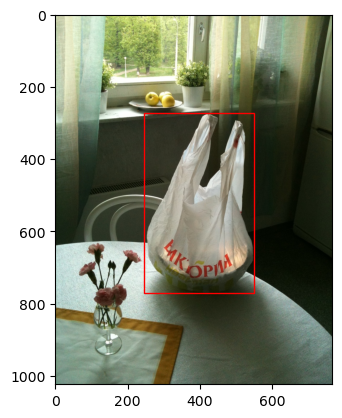

In [79]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import random
import glob
from PIL import Image

test_images_path = "PlasticDetection/images/001.Plastic_bag/images/test/*.jpg"
train_images_path = "PlasticDetection/images/001.Plastic_bag/images/train/*.jpg"


def visualize_transposed_bb(dataset):
    images_path = train_images_path if dataset == 'train' else test_images_path if dataset == 'test' else 0
    if dataset == 0:
        raise Exception("Invalid input parameter, must be either train or validation")
    
    start = 0
    end = 0
    
    if dataset == 'train':
        start, end, df, split = 53, 69, final_train_df, "train"
    elif dataset == 'test':
        start, end, df, split = 52, 68, final_test_df, "test"
    else:
        raise Exception("Invalid parameter")
    
    image_folder = images_path
    images_paths = glob.glob(image_folder)
    num_of_images = len(images_paths)
#     print(images_paths)

#     print(num_of_images)
    random_int = random.randint(0, 100)
    random_image = images_paths[random_int]
    print(random_image)
    img = Image.open(random_image)
    img = img.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
    id_of_image = random_image[start:end]
    #PlasticDetection/images/001.Plastic_bag/images/test/00a76046606aa888.jpg
    df_rows = df.loc[(df.ImagePath == f"001.Plastic_bag/images/{split}/{id_of_image}.jpg") & (df.className == '0.000') ]
    
    image_width, image_height = img.size
    
    fig ,ax = plt.subplots()
    ax.imshow(img)
    
    
    for index, row in df_rows.iterrows():
        print(row['XMin'], row['XMax'], row['YMin'], row['YMax'])
        
        xmin = row['XMin']
        xmax = row['XMax']
        ymin = row['YMin']
        ymax = row['YMax']
        
        new_xmin = xmin * image_width
        new_xmax = xmax * image_width
        new_ymin = ymin * image_height
        new_ymax = ymax * image_height
        print(new_xmin,new_xmax,new_ymin,new_ymax)
        
        #flip the bb coordinates
        xmax_flipped = (image_width/2) - (new_xmin-(image_width/2))
        xmin_flipped = (image_width/2) - (new_xmax-(image_width/2))
        
        
        
        width = xmax_flipped - xmin_flipped
        height = new_ymax - new_ymin
        
        rect = patches.Rectangle((xmin_flipped,new_ymin), width, height, linewidth = 1, edgecolor = 'r', facecolor = 'none')
        ax.add_patch(rect)
    plt.show()
    
visualize_transposed_bb("train")

In [76]:
len(final_test_df)


198

In [80]:
test_images_path = 'PlasticDetection/images/001.Plastic_bag/images/test/*.jpg'
train_images_path = 'PlasticDetection/images/001.Plastic_bag/images/train/*.jpg'



def augment_data(dataset):
    images_path = train_images_path if dataset == "train" else test_images_path if dataset == "test" else 0
    if images_path == 0:
        raise Exception("Invalid Input parameter")
    start = 0
    end = 0
    if dataset == "train":
        start,end,df = 29,45,final_train_df
    elif dataset == "test":
        start,end,df = 28,44,final_test_df
    
    
    temp_df = pd.DataFrame(columns=["header_cols","label_width","className","XMin","YMin","XMax","YMax","ImagePath"],dtype = object)
    counter = 0
    for index,row in df.iterrows():
        img_path = row["ImagePath"]#image path in the df
        id = img_path[start:end]
        im_path = f"PlasticDetection/images/001.Plastic_bag/images/{dataset}/{id}.jpg" #image path for the physical location of the image(full path
        img = Image.open(im_path)
        image_width,image_height = img.size
        img_flip = img.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
        img_flip.save(f"PlasticDetection/images/001.Plastic_bag/images/{dataset}/flipped_{id}.jpg")
        new_image_path = f"001.Plastic_bag/images/{dataset}/flipped_{id}.jpg"
        
        xmin = row['XMin'] * image_width
        xmax = row['XMax'] * image_width
        ymin = row['YMin']
        ymax = row['YMax']
        
        #getting the new coordinates for the flipped bounding boxes
        new_xmin = ((image_width/2)-(xmin-(image_width/2))) / image_width
        new_xmax = ((image_width/2)-(xmax-(image_width/2))) / image_width
        
        
        temp_df.loc[counter]=[2,5,"0.000",new_xmin,ymin,new_xmax,ymax,new_image_path]
        counter +=1
    
    df_merged = df.append(temp_df, ignore_index = True)

    df_merged.to_csv(f"{dataset}.lst", sep = "\t", float_format = "%.4f", header = None)
    print(len(df))#original df
    print("augmented df length below")
    print(len(temp_df))
    
    

In [81]:
folder = glob.glob(train_images_path)
counter = 0
for i in folder:
    counter+=1
print(counter)

449


In [82]:
folder = glob.glob(test_images_path)
counter = 0
for i in folder:
    counter+=1
print(counter)

162


In [83]:
len(final_train_df)

788

In [84]:
len(final_test_df)

198

In [85]:
augment_data("test")


198
augmented df length below
198


/tmp/ipykernel_36/767093511.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_merged = df.append(temp_df, ignore_index = True)


In [86]:
folder = glob.glob(test_images_path)
counter = 0
for i in folder:
    counter+=1
print(counter)

324


In [87]:
augment_data("train")

788
augmented df length below
788


/tmp/ipykernel_36/767093511.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_merged = df.append(temp_df, ignore_index = True)


In [88]:
folder = glob.glob(train_images_path)
counter = 0
for i in folder:
    counter+=1
print(counter)

898


In [4]:
import platform


In [8]:
import distro

if distro.linux_distribution(full_distribution_name=False)[0] == "debian":
    !apt-get update
    !apt-get install ffmpeg libsm6 libxext6 -y


/tmp/ipykernel_18/465215042.py:3: DeprecationWarning: distro.linux_distribution() is deprecated. It should only be used as a compatibility shim with Python's platform.linux_distribution(). Please use distro.id(), distro.version() and distro.name() instead.
  if distro.linux_distribution(full_distribution_name=False)[0] == "debian":


Get:1 http://security.debian.org/debian-security bullseye-security InRelease [48.4 kB]
Get:2 http://deb.debian.org/debian bullseye InRelease [116 kB]                 
Get:3 http://deb.debian.org/debian bullseye-updates InRelease [44.1 kB]
Get:4 http://security.debian.org/debian-security bullseye-security/main amd64 Packages [260 kB]
Get:5 http://deb.debian.org/debian bullseye/main amd64 Packages [8062 kB]
Get:6 http://deb.debian.org/debian bullseye-updates/main amd64 Packages [17.7 kB]
Fetched 8548 kB in 2s (3908 kB/s)                     
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libsm6 is already the newest version (2:1.2.3-1).
libxext6 is already the newest version (2:1.3.3-1.1).
The following additional packages will be installed:
  alsa-topology-conf alsa-ucm-conf i965-va-driver intel-media-va-driver
  libaacs0 libasound2 libasound2-data libass9 libasyncns0 libavc1394-0
  libavcodec58 libavdevice5

In [22]:
!pip install distro

  Using cached distro-1.8.0-py3-none-any.whl (20 kB)

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [9]:
import sys
!{sys.executable} -m pip install opencv-python
!{sys.executable} -m pip install mxnet

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/b7/8a/b2f7e1a434d56bf1d7570fc5941ace0847404e1032d7f1f0b8fed896568d/opencv_python-4.8.1.78-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 19.2 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 21.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [28]:
RESIZE_SIZE = 256
BASE_DIR = "PlasticDetection/"

In [29]:
!python tools/im2rec.py --resize $RESIZE_SIZE --pack-label test $BASE_DIR/images/


Creating .rec file from /root/test.lst in /root
multiprocessing not available, fall back to single threaded encoding
time: 0.053620338439941406  count: 0


In [30]:
!python tools/im2rec.py --resize $RESIZE_SIZE --pack-label train $BASE_DIR/images/


Creating .rec file from /root/train.lst in /root
multiprocessing not available, fall back to single threaded encoding
time: 0.032029151916503906  count: 0
time: 27.97273874282837  count: 1000


In [9]:
file_path = '/opt/conda/lib/python3.10/site-packages/mxnet/numpy/utils.py'

# Read the file
with open(file_path, 'r') as file:
    content = file.readlines()

# Replace np.bool with np.bool_
corrected_content = []
for line in content:
    corrected_line = line.replace('np.bool_', 'bool')
    corrected_content.append(corrected_line)

# Write the corrected content back to the file
with open(file_path, 'w') as file:
    file.writelines(corrected_content)


In [6]:
import sagemaker 

bucket = "group-11-ccda-project"
prefix = "DEMO-ObjectDetection"

In [7]:
from sagemaker import get_execution_role
role = get_execution_role()

sess = sagemaker.Session()


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [8]:
train_channel = prefix + "/train"

sess.upload_data(path= "train.rec", bucket = bucket, key_prefix = train_channel)

s3_train_data = "s3://{}/{}".format(bucket,train_channel)

In [9]:
print(s3_train_data)

s3://group-11-ccda-project/DEMO-ObjectDetection/train


In [10]:
validation_channel = prefix + "/validation"

sess.upload_data(path= "test.rec", bucket = bucket, key_prefix = validation_channel)

s3_validation_data = "s3://{}/{}".format(bucket,validation_channel)

In [11]:
print(s3_validation_data)


s3://group-11-ccda-project/DEMO-ObjectDetection/validation


In [12]:
s3_output_location =  "s3://{}/{}/output".format(bucket, prefix)
print(s3_output_location)

s3://group-11-ccda-project/DEMO-ObjectDetection/output


In [13]:
from sagemaker import image_uris

training_image = image_uris.retrieve(
    
    region = sess.boto_region_name, framework = "object-detection", version = "1"
)

print(training_image)

825641698319.dkr.ecr.us-east-2.amazonaws.com/object-detection:1


In [14]:
import sagemaker
od_model = sagemaker.estimator.Estimator(
    training_image,
    role,
    instance_count = 1,
    instance_type = "ml.p3.2xlarge",
    volume_size = 50,
    max_run = 360000,
    input_mode = "File",
    output_path = s3_output_location,
    sagemaker_session = sess,)

In [15]:
print(od_model)

In [16]:
import glob

folder = glob.glob('PlasticDetection/images/001.Plastic_bag/images/train/*.jpg')
counter =0
for i in folder:
    counter+=1
print(counter)

898


In [17]:
def set_hyperparameters(num_epochs, lr_steps):
    num_classes = 1
    num_training_samples = 898
    
    od_model.set_hyperparameters(
        base_network = "resnet-50",
        use_pretrained_model = 1,
        num_classes = num_classes,
        epochs = num_epochs,
        lr_scheduler_step = lr_steps,
        lr_scheduler_factor = 0.1,
        momentum = 0.9,
        weight_decay = 0.0005,
        nms_threshold = 0.45,
        image_shape = 512,
        num_training_samples = 898 
    )

In [18]:
set_hyperparameters(100, "50,70,80,90,95")


In [19]:
from sagemaker.tuner import CategoricalParameter, ContinuousParameter, HyperparameterTuner


hyperparameter_ranges = {
    
    "learning_rate": ContinuousParameter(0.001,0.1),
    "mini_batch_size": CategoricalParameter([8,16]),
    "optimizer": CategoricalParameter(["sgd","adam"])

}

In [20]:
max_jobs = 8
max_parallel_jobs = 1
objective_metric_name = "validation:mAP"
objective_type = "Maximize"

In [21]:
tuner = HyperparameterTuner(estimator = od_model,
                            objective_metric_name = objective_metric_name,
                            hyperparameter_ranges = hyperparameter_ranges,
                            objective_type = objective_type,
                            max_jobs = max_jobs,
                            max_parallel_jobs = max_parallel_jobs          
                           )

In [22]:
train_data = sagemaker.inputs.TrainingInput(
            s3_train_data,
            distribution = "FullyReplicated",
            content_type = "application/x-recordio",
            s3_data_type = "S3Prefix"
)

validation_data = sagemaker.inputs.TrainingInput(
            s3_validation_data,
            distribution = "FullyReplicated",
            content_type = "application/x-recordio",
            s3_data_type = "S3Prefix"
)

data_channels = {"train": train_data, "validation": validation_data}

In [ ]:
tuner.fit(inputs = data_channels, logs = True)


No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


....

In [2]:
import sagemaker
from sagemaker import get_execution_role

role = get_execution_role()

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [3]:
sess = sagemaker.Session()
from sagemaker import image_uris


training_image = image_uris.retrieve(
    region = sess.boto_region_name, framework = "object-detection", version = "1"
)
print(training_image)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
825641698319.dkr.ecr.us-east-2.amazonaws.com/object-detection:1


In [4]:
model = sagemaker.model.Model(
image_uri = training_image,
model_data = 's3://group-11-ccda-project/DEMO-ObjectDetection/output/object-detection-231211-2229-006-069591fe/output/model.tar.gz',
role = role    
)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [5]:
endpoint_name = 'Plastic-detection-endpoint-001'

deployment = model.deploy(
initial_instance_count = 1,
instance_type = "ml.m4.xlarge",
endpoint_name = endpoint_name)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
------------!

In [6]:
import json 
import boto3
runtime = boto3.client(service_name = "runtime.sagemaker")

In [7]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg#pyplot


def visualize_detection(img_file, dets, thresh = 0.6):
    img = mpimg.imread(img_file)
    plt.imshow(img)
    width = img.shape[1]
    height = img.shape[0]
    colors = dict()
    num_detections = 0
    for det in dets:
        (klass,score,x0,y0,x1,y1) = det #0
        if score < thresh:
            continue
        num_detections +=1
        cls_id = int(klass)#1
        if cls_id not in colors:
            colors[cls_id] = (random.random(),random.random(),random.random()) #(0.1,0.5,0.4)
        xmin = int(x0*width)
        ymin = int(y0*height)
        xmax = int(x1*width)
        ymax = int(y1*height) 
        
        
        rect = plt.Rectangle(
            (xmin,ymin),
            xmax - xmin,
            ymax - ymin,
            fill = False,
            edgecolor = colors[cls_id],
            linewidth = 3.5
        )
        plt.gca().add_patch(rect)
        plt.gca().text(
        xmin,
        ymin-2,
        "{:.3f}".format(score),
        bbox = dict(facecolor = colors[cls_id], alpha = 0.5),
        fontsize = 12,
        color = "white"
        )
    print("Number of detections" + str(num_detections))
    plt.show()

In [8]:
def show_plastic_prediction(filename, ep, thresh = 0.3):
    b = ""
    with open(filename, "rb" ) as image:
        f = image.read()
        b = bytearray(f)
    endpoint_response = runtime.invoke_endpoint(EndpointName = ep, ContentType = "image/jpeg", Body = b)
    results = endpoint_response["Body"].read()
    detections = json.loads(results)
    
    
    visualize_detection(filename, detections['prediction'], thresh)

Number of detections1


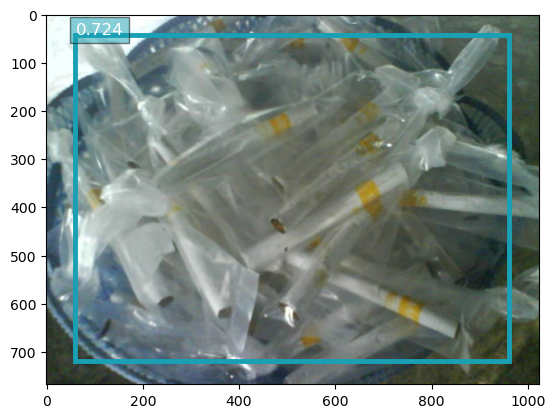

In [9]:
show_plastic_prediction('unzipped/validationImages/validation/data/1602934b52b119cc.jpg', endpoint_name)


Number of detections2


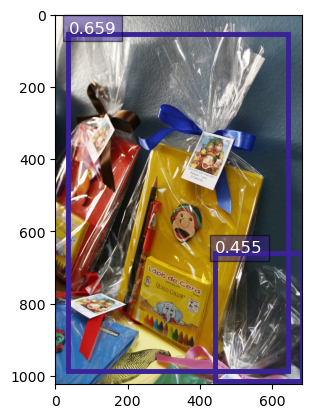

In [10]:
show_plastic_prediction('unzipped/validationImages/validation/data/488ab15e2780bec9.jpg', endpoint_name)


Number of detections1


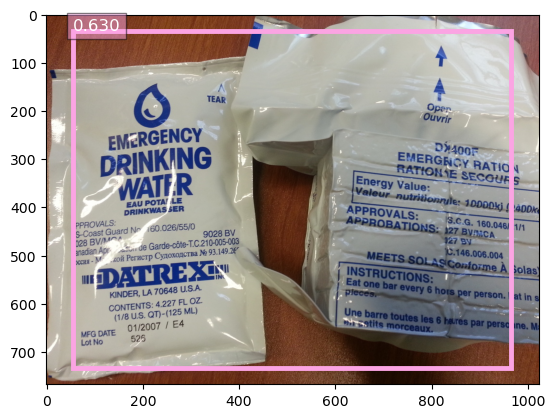

In [13]:
show_plastic_prediction('unzipped/validationImages/validation/data/ecd5fc22a65b8d32.jpg', endpoint_name)

